<a href="https://colab.research.google.com/github/Sanchit0912/MLAP/blob/main/Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Sanchit0912/MLAP/main/Clustering/Income%20Data.csv")


In [7]:
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


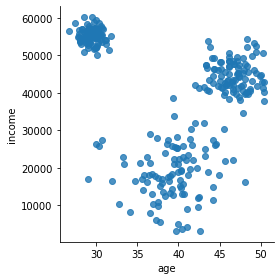

In [12]:
sn.lmplot( "age", "income", data=df, fit_reg = False, size = 4 );

In [14]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
df["clusterid"] = clusters.labels_

In [16]:
df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


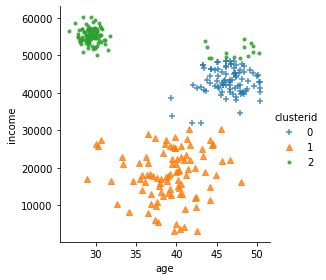

In [17]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(
df[["age", "income"]] )
scaled_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [22]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_df )
df["clusterid_new"] = clusters_new.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


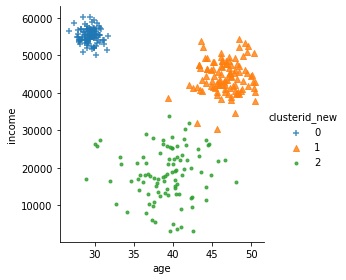

In [24]:
markers = ['+','^','.']
sn.lmplot( "age", "income",
data=df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );

In [25]:
df.groupby( 'clusterid' )['age',
'income'].agg( ["mean",
'std'] ).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clusterid        age                  income             
                  mean       std          mean          std
0         0  46.419101  2.289620  43053.932584  3613.769632
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  31.700435  6.122122  54675.652174  2362.224320